In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-talk')

In [2]:
zspec_table = pd.read_csv("ALL_Spec_Only_V7_Aper6_CCM89.csv")
hydra_table = pd.read_csv("Fields/Hydra.csv")

/tmp/ipykernel_240840/1524856715.py:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  zspec_table = pd.read_csv("ALL_Spec_Only_V7_Aper6_CCM89.csv")


In [3]:
ra = hydra_table["RA"]
dec = hydra_table["DEC"]
g_petro = hydra_table["g_petro"]
r_petro = hydra_table["r_petro"]
zml = hydra_table["zml"]

class_ = zspec_table["class_Spec"]

In [4]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

In [5]:
#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

In [17]:
mask = (r_petro < 16) & (zml > 0.0) & (zml < 0.03)
mask_bright = (r_petro < 8) & (class_ == 'GALAXY')

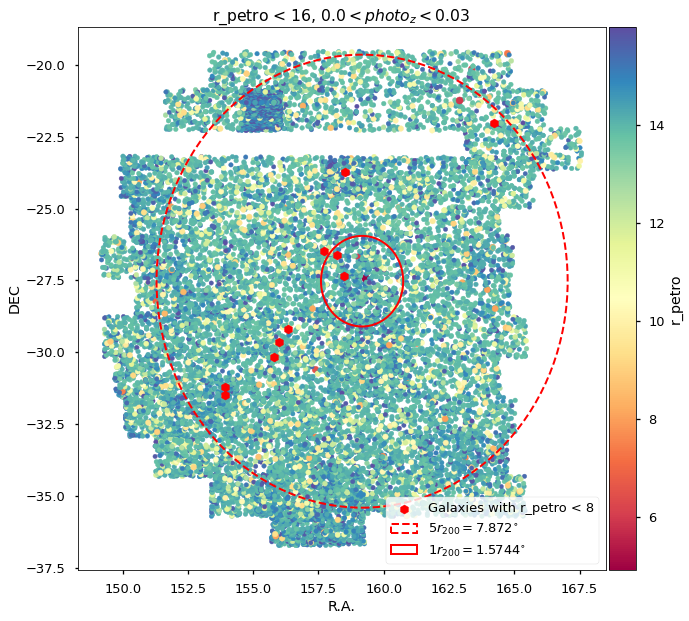

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(10, 10))
cm = plt.cm.get_cmap('Spectral')

ax0 = fig.add_subplot(111)
sc0 = ax0.scatter(x=ra[mask], y=dec[mask], c=r_petro[mask], cmap=cm, s=(1/r_petro[mask])*300)
sc1 = ax0.scatter(x=ra[mask_bright], y=dec[mask_bright], marker='h', color='red', label='Galaxies with r_petro < 8')
ax0.set_ylabel("DEC")
ax0.set_xlabel("R.A.")
ax0.set_title(r"r_petro < 16, $0.0 < photo_z < 0.03$")

divider = make_axes_locatable(ax0)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc0, cax=cax1, orientation='vertical', label='r_petro')

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax0.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax0.add_patch(OneR200)

ax0.legend()
plt.show()

In [14]:
ra_spec = zspec_table["RA"]
dec_spec = zspec_table["DEC"]

In [26]:
def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances = dist(ra_spec, dec_spec)
mask_spec = (distances < 5*radius) & (class_ == 'GALAXY')

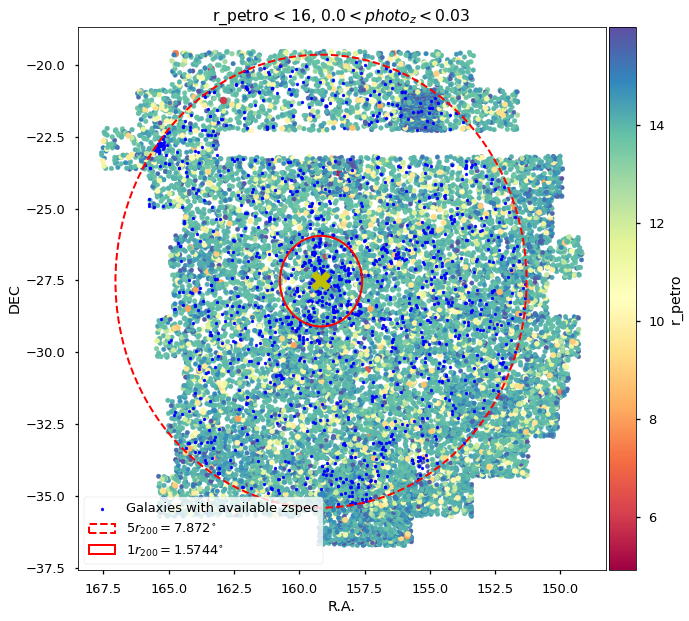

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(10, 10))
cm = plt.cm.get_cmap('Spectral')

ax0 = fig.add_subplot(111)
sc0 = ax0.scatter(x=ra[mask], y=dec[mask], c=r_petro[mask], cmap=cm, s=(1/r_petro[mask])*300)
sc1 = ax0.scatter(x=ra_spec[mask_spec], y=dec_spec[mask_spec], marker='h', s=10, color='blue', label='Galaxies with available zspec')
ax0.set_ylabel("DEC")
ax0.set_xlabel("R.A.")
ax0.set_title(r"r_petro < 16, $0.0 < photo_z < 0.03$")
ax0.plot(ra_0, dec_0, 'yX', markersize=20)
ax0.invert_xaxis()

divider = make_axes_locatable(ax0)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc0, cax=cax1, orientation='vertical', label='r_petro')

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax0.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax0.add_patch(OneR200)

ax0.legend()
plt.show()

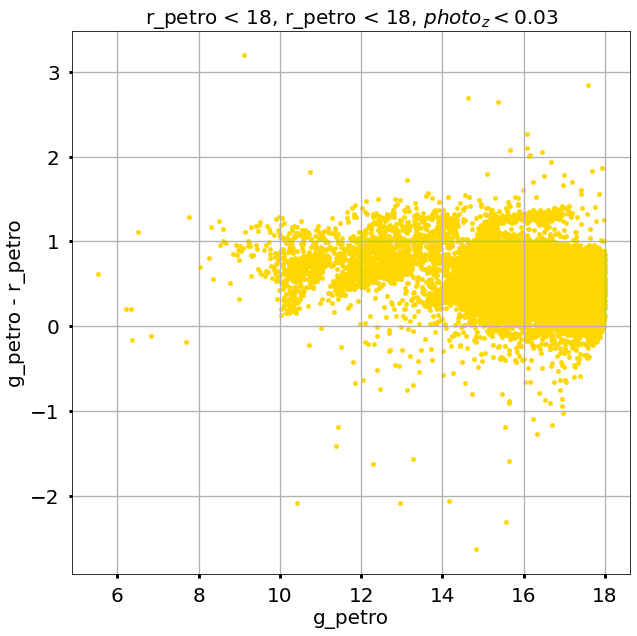

In [46]:
mask2 = (r_petro < 18) & (zml > 0.0) & (zml < 0.03) & (g_petro < 18)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(g_petro[mask2], g_petro[mask2] - r_petro[mask2], marker='.', color='gold')
ax.set_ylabel("g_petro - r_petro", fontsize=20)
ax.set_xlabel("g_petro", fontsize=20)
ax.set_title(r"r_petro < 18, r_petro < 18, $photo_z < 0.03$", fontsize=20)
ax.yaxis.set_tick_params(labelsize=20, width=3)
ax.xaxis.set_tick_params(labelsize=20, width=3)
ax.grid()